# dataset information

this dataset is about Doctor's consultation fees. Here we discus about high consultation fees which may be not affordable for everyone.This dataset has 5961 rows × 8 columns. 

# dataset attributes information

Unnamed: 0 - this looks like index column

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.


# import modules

In [423]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [424]:
from zipfile import ZipFile
file_name="C:\\Users\\batha\\Downloads\\Doctor_fee_consultation.zip"
with ZipFile(file_name,'r') as zip:
    zip.printdir()
    print("Extracting all files now")
    zip.extractall()
    print("done")

File Name                                             Modified             Size
Final Participant Data Folder/Final_Test.xlsx  2019-02-06 21:47:00        81282
Final Participant Data Folder/Sample_submission.xlsx 2019-02-06 22:14:06        21219
Final Participant Data Folder/Final_Train.xlsx 2019-02-06 21:46:52       241104
Extracting all files now
done


In [425]:
import zipfile
zf=zipfile.ZipFile("C:\\Users\\batha\\Downloads\\Doctor_fee_consultation.zip")
de_zf=pd.read_excel(zf.open('Final Participant Data Folder/Final_Train.xlsx'))

converting xlsx file into csv

In [426]:
de_zf.to_csv("Doctor_fee_consultation.csv")

# loading csv file

In [427]:
df=pd.read_csv("Doctor_fee_consultation.csv")
df

,Unnamed: 0,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...,...
5956,5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [428]:
df.shape

(5961, 8)

this dataset has 5961 rows and 8 columns

In [429]:
df.columns

Index(['Unnamed: 0', 'Qualification', 'Experience', 'Rating', 'Place',
       'Profile', 'Miscellaneous_Info', 'Fees'],
      dtype='object')

# data type of attributes

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5961 non-null   int64 
 1   Qualification       5961 non-null   object
 2   Experience          5961 non-null   object
 3   Rating              2659 non-null   object
 4   Place               5936 non-null   object
 5   Profile             5961 non-null   object
 6   Miscellaneous_Info  3341 non-null   object
 7   Fees                5961 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 372.7+ KB


# statistical info¶¶

In [431]:
df.describe()

,Unnamed: 0,Fees
count,5961.000000,5961.000000
mean,2980.000000,307.944640
std,1720.936809,190.920373
min,0.000000,5.000000
25%,1490.000000,150.000000
50%,2980.000000,300.000000
75%,4470.000000,500.000000
max,5960.000000,950.000000


minimum Doctor's Consultation Fee is 5.00 and maximum is 950.00

unnamed:0 column looks like index column so we would remove this in next step


# check unique values in the dataset

In [432]:
df.apply(lambda x: len(x.unique()))

Unnamed: 0            5961
Qualification         1420
Experience              64
Rating                  52
Place                  878
Profile                  6
Miscellaneous_Info    2999
Fees                    40
dtype: int64

# preprocessing the dataset

In [433]:
df.isnull().sum()

Unnamed: 0               0
Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

columns are mentioned below which have Nan values-

Rating                3302

Place                   25

Miscellaneous_Info    2620

In [434]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
print("Total number of categorical columns are:- ",len(cat_col))
cat_col  

Total number of categorical columns are:-  6


['Qualification',
 'Experience',
 'Rating',
 'Place',
 'Profile',
 'Miscellaneous_Info']

all types profile counts

In [435]:
print(df['Profile'].value_counts())

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


fill missing values

In [436]:
df['Rating'].mode()

0    100%
dtype: object

In [437]:
df['Rating'].fillna('100%',inplace = True)

In [438]:
df['Place'].mode()

0    HSR Layout, Bangalore
dtype: object

In [439]:
df['Place'].fillna('HSR Layout, Bangalore',inplace = True)

In [440]:
df['Miscellaneous_Info'].mode()

0    Acrylic Partial Denture Crowns and Bridges Fix...
dtype: object

In [441]:
df['Miscellaneous_Info'].fillna('Acrylic Partial Denture Crowns and Bridges Fix...',inplace=True)

In [442]:
df.isnull().sum()

Unnamed: 0            0
Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

droping unnamed column

In [443]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [444]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


removing percentage sign and string create new attributes

In [445]:
df['Rating %'] = df['Rating'].str.slice(stop=-1).astype(int)

In [446]:
df['Years of Experience']=df['Experience'].str.replace(r'\D','').astype(int)

In [447]:
df['locality'] = df['Place'].str.split(",").str[0]
df['city'] = df['Place'].str.split(",").str[1]

In [448]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Rating %,Years of Experience,locality,city
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,100,24,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,98,12,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,100,9,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,100,12,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,100,20,Keelkattalai,Chennai


city counts

In [449]:
print(df['city'].value_counts())

 Bangalore             1283
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: city, dtype: int64


# Target variable

our target variable is Fees

# EDA

univariate analysis

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

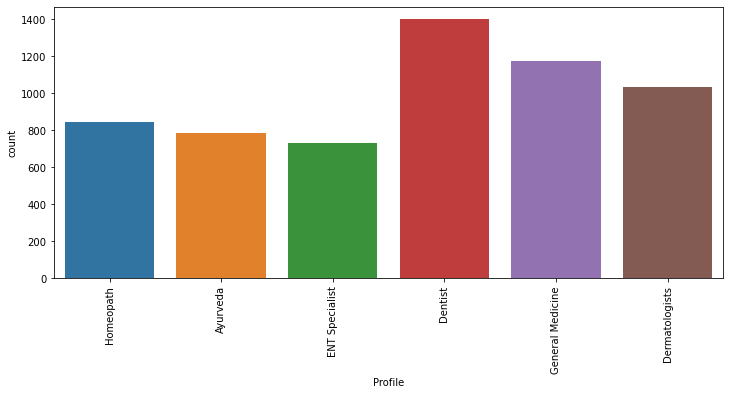

In [450]:
plt.figure(figsize=(12,5))
sns.countplot(df['Profile'])
plt.xticks(rotation=90)

from above observation it is clear that Dentist counting is high in India and after that General Medicine comes. ENT Specialist are minimum in above observation

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

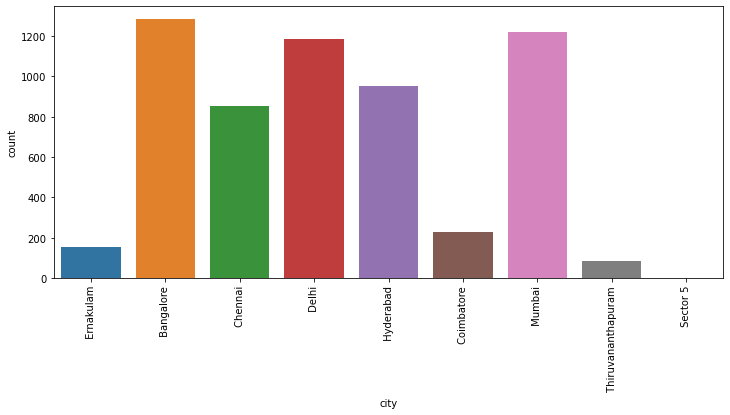

In [451]:
plt.figure(figsize=(12,5))
sns.countplot(df['city'])
plt.xticks(rotation=90)

from above observation it clear that maximum Doctors are from Banglore and after that Mumbai comes in counts of Doctors.

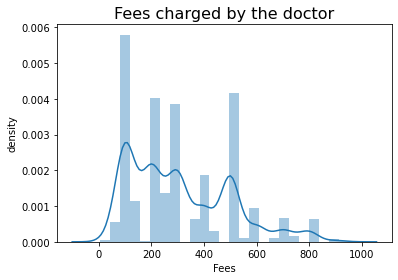

In [452]:
sns.distplot(df["Fees"])
plt.rcParams['figure.figsize']=(12,5)
plt.title("Fees charged by the doctor",fontsize=16)
plt.xlabel("Fees")
plt.ylabel("density")
plt.show()

Most of Doctors charge about 100 rupees in India

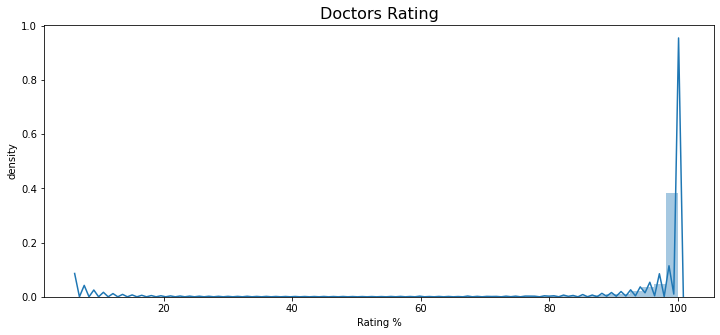

In [453]:
sns.distplot(df["Rating %"])
plt.rcParams['figure.figsize']=(12,5)
plt.title("Doctors Rating",fontsize=16)
plt.xlabel("Rating %")
plt.ylabel("density")
plt.show()

in this dataset most doctors are rated by 100

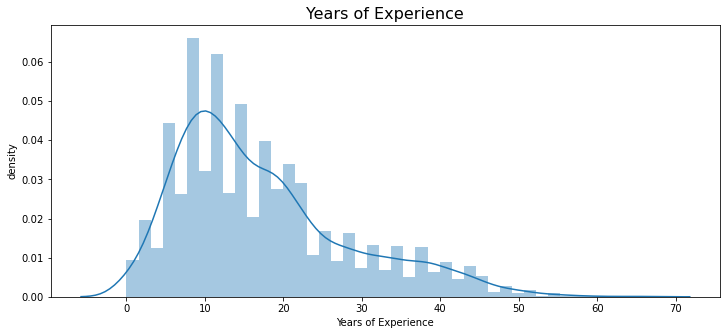

In [454]:
sns.distplot(df["Years of Experience"])
plt.rcParams['figure.figsize']=(12,5)
plt.title("Years of Experience",fontsize=16)
plt.xlabel("Years of Experience")
plt.ylabel("density")
plt.show()

most of Doctors have experience about 9 to 10 years and a few Doctors have experience above 50 years

bivariate analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

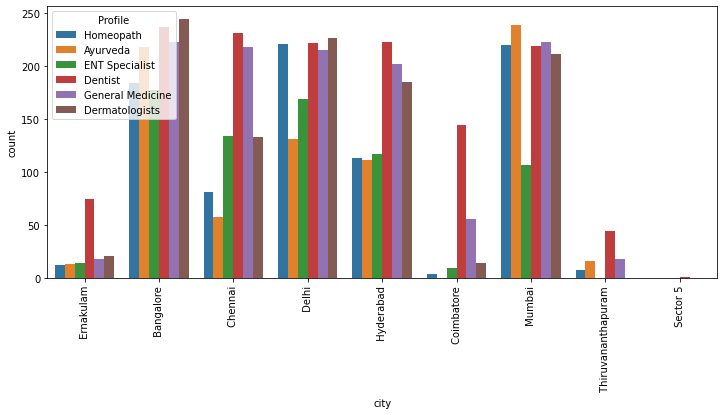

In [455]:
plt.figure(figsize=(12,5))
sns.countplot(x='city',hue='Profile',data=df)
plt.xticks(rotation=90)

from above observation it is clear that Dentist are in large numbers in every city. We can see that Dermatologist are maximum in Banglore but in Mumbai Ayurvedas are maximum

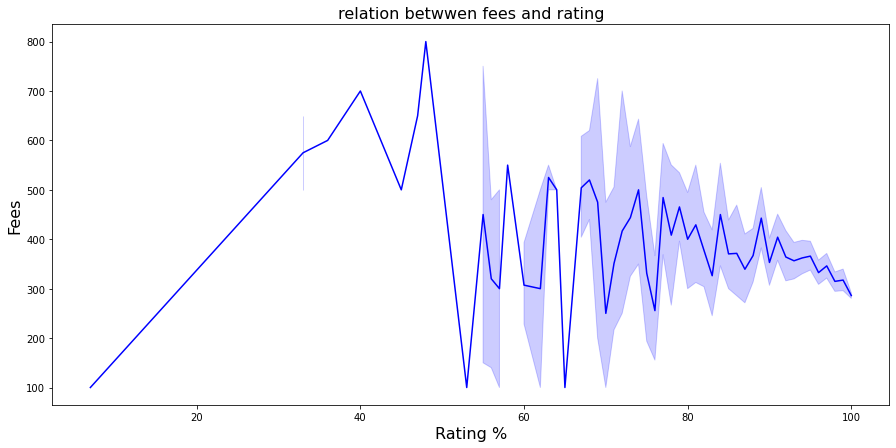

In [456]:
plt.figure(figsize=(15,7))
sns.lineplot(x="Rating %", y="Fees", color='b', data=df)
plt.title("relation betwwen fees and rating",fontsize=16)
plt.xlabel("Rating %",fontsize=16)
plt.ylabel("Fees",fontsize=16)
plt.show()

from above observation it is clear that in the starting Fees and Rating are related to each other parallelly but when rating cross 35 then this relation is ended. We can see that when rating is about 50 to 55 then fees is maximum after that fees and Rating are not correlated so much to each other

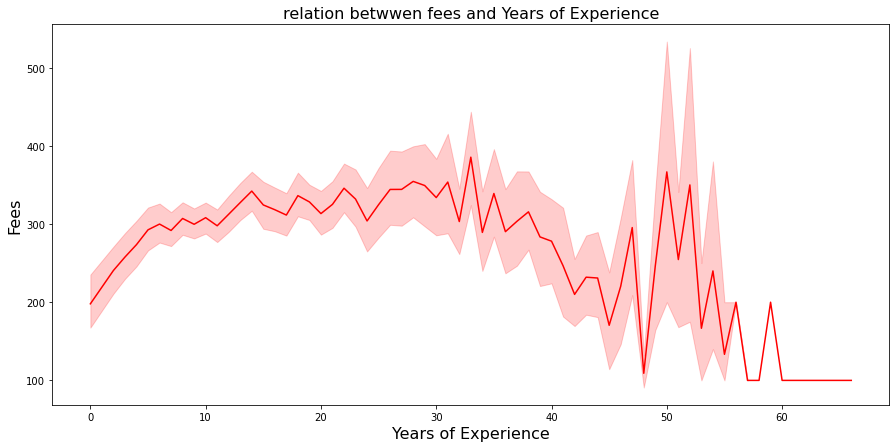

In [457]:
plt.figure(figsize=(15,7))
sns.lineplot(x="Years of Experience", y="Fees", color='r', data=df)
plt.title("relation betwwen fees and Years of Experience",fontsize=16)
plt.xlabel("Years of Experience",fontsize=16)
plt.ylabel("Fees",fontsize=16)
plt.show()

Doctors who have experience about 5 to 35 years, are getting consultation fees between 300 to 400. 

In [458]:
df['Qualification'].value_counts()[:30]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

we can see that-

BDS                                                      488

BHMS                                                     477

BAMS                                                     471

MBBS                                                     334

MBBS, MS - ENT                                           220

MBBS, MD - Dermatology                                   178

MBBS, MD - General Medicine                              177

MBBS, MD - Dermatology , Venereology & Leprosy           140

above qualification are present in a very high number

In [459]:
a=df.groupby(['Profile'])['Fees'].mean().reset_index()
a

,Profile,Fees
0,Ayurveda,238.968193
1,Dentist,238.199714
2,Dermatologists,393.133462
3,ENT Specialist,387.321429
4,General Medicine,313.908781
5,Homeopath,306.499407


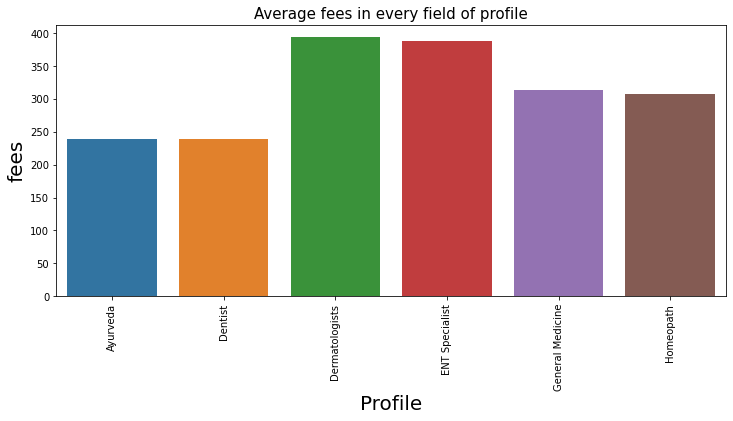

In [460]:
sns.barplot(x='Profile',y='Fees',data=a)
plt.xlabel("Profile",fontsize=20)
plt.ylabel("fees",fontsize=20)
plt.title("Average fees in every field of profile",fontsize=15)
plt.xticks(rotation=90)
plt.show()

It states that 'Ayurveda' doctors earns some less than others.

whereas the 'Dermatologists' and the 'ENT' specialists are earning more.


In [461]:
b=df.groupby(['city'])['Fees'].mean().reset_index()
b

,city,Fees
0,Bangalore,324.422447
1,Chennai,283.602339
2,Coimbatore,154.298246
3,Delhi,363.006757
4,Ernakulam,188.431373
5,Hyderabad,307.507886
6,Mumbai,308.292863
7,Sector 5,250.000000
8,Thiruvananthapuram,167.267442


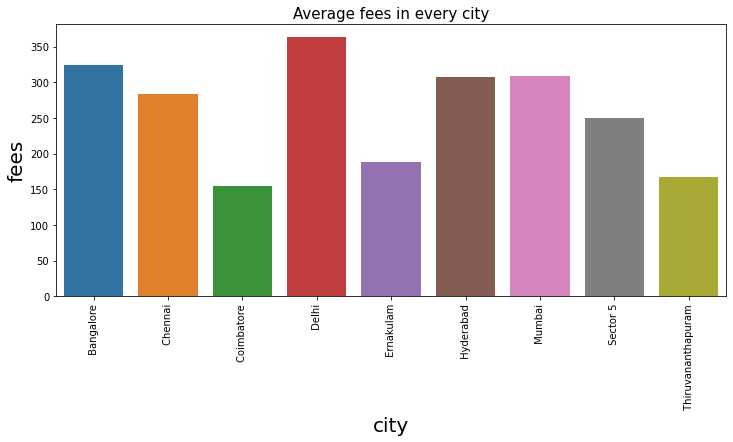

In [462]:
sns.barplot(x='city',y='Fees',data=b)
plt.xlabel("city",fontsize=20)
plt.ylabel("fees",fontsize=20)
plt.title("Average fees in every city",fontsize=15)
plt.xticks(rotation=90)
plt.show()

we can see that average fees is very high in Delhi and after that in Banglore. It shows that the cities are highly correlated with the wages or charges of the doctor.

# top 40 qualification according to fees

In [463]:
c=df.groupby(['Qualification'])['Fees'].mean().sort_values(ascending=False).reset_index()[0:40]
c

,Qualification,Fees
0,"MD - General Medicine, DM - Nephrology, MBBS",900.0
1,"MA - Psychology, BHMS",900.0
2,"MBBS, DNB - Dermatology & Venereology, DDVL",900.0
3,"BAMS, Member of the Royal Society for the Prom...",900.0
4,"DNB - Dermatology & Venereology, DVD, MBBS, MCPS",900.0
5,"MBBS, Fellowship in Diabetology(Royal Liverpoo...",900.0
6,"LCEH, BHMS",800.0
7,"MBBS, MD - Pediatrics, DNB - Pediatrics",800.0
8,"MBBS, MS - ENT, DNB - ENT, Diploma in Otorhino...",800.0
9,"MBBS, MD - General Medicine, Certificate Cours...",800.0


# dropping the columns

In [464]:
df.drop(["Qualification","Experience",'Rating','Place','Miscellaneous_Info','locality','city'],axis=1,inplace=True)

In [465]:
df.head()

,Profile,Fees,Rating %,Years of Experience
0,Homeopath,100,100,24
1,Ayurveda,350,98,12
2,ENT Specialist,300,100,9
3,Ayurveda,250,100,12
4,Ayurveda,250,100,20


before label Encodng we have to convert Sector 5 into string only in city column

# Label Encoding

In [466]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col=['Profile']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [467]:
df.head()

,Profile,Fees,Rating %,Years of Experience
0,5,100,100,24
1,0,350,98,12
2,3,300,100,9
3,0,250,100,12
4,0,250,100,20


# one hot Encoding

In [468]:
df =pd.get_dummies(df,columns=['Profile'])
df.head()

,Fees,Rating %,Years of Experience,Profile_0,Profile_1,Profile_2,Profile_3,Profile_4,Profile_5
0,100,100,24,0,0,0,0,0,1
1,350,98,12,1,0,0,0,0,0
2,300,100,9,0,0,0,1,0,0
3,250,100,12,1,0,0,0,0,0
4,250,100,20,1,0,0,0,0,0


# input split¶

In [469]:
X=df.drop(columns=['Fees'],axis=1)
y=df['Fees']

# spliting the data

In [470]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# model training

LinearRegression

In [471]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 139.0650613797892
MSE: 30144.287115334417
RMSE: 173.62110216023402


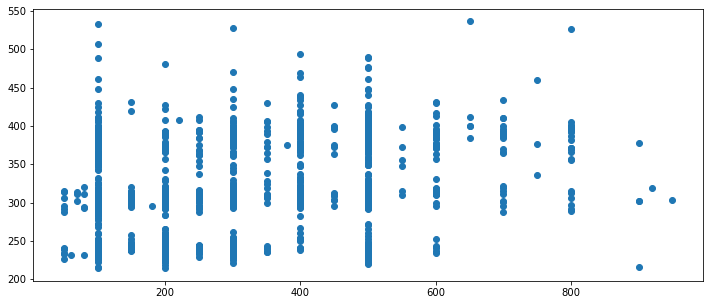

In [472]:
plt.scatter(x=y_test,y=pred)

DecisionTreeRegressor

In [473]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 154.1698263587461
MSE: 39609.68513965063
RMSE: 199.02182076257526


Text(0, 0.5, 'Predicted Y')

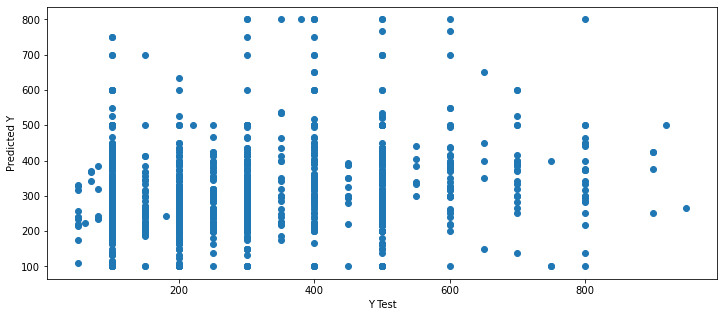

In [474]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

RandomForestRegressor

In [475]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 143.4016275846581
MSE: 33015.40281644135
RMSE: 181.7014111569895


Text(0, 0.5, 'Predicted Y')

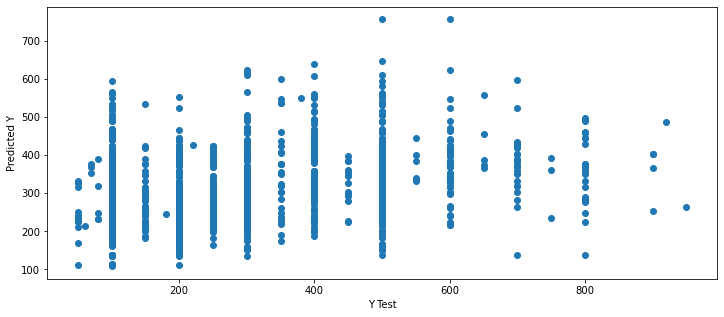

In [476]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

 SGDRegressor

In [477]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train,y_train)
pred=rdr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 143.4016275846581
MSE: 33015.40281644135
RMSE: 181.7014111569895


Text(0, 0.5, 'Predicted Y')

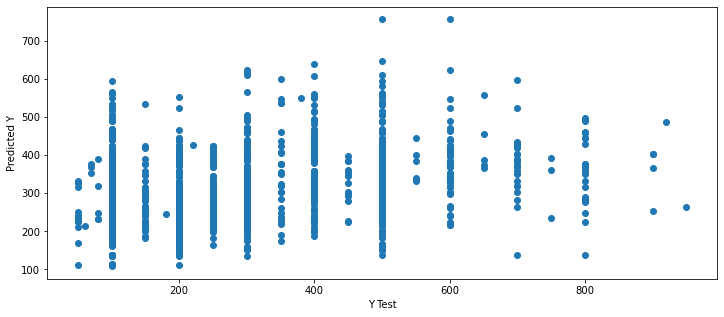

In [478]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

after comparing all above models we find that LinearRegression model is best because it has low RMSE than the other model. so we save this model

# Lets see final Actual Vs Predicted sample.

,Y Test,Pred
1344,300,197.659214
625,200,317.231792
5909,400,343.875000
3560,250,253.856944
1545,500,357.907742


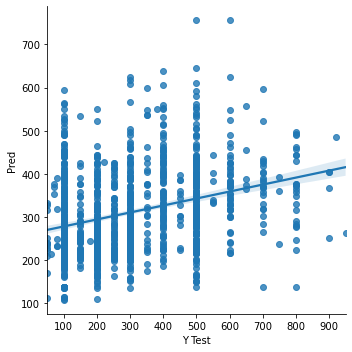

In [479]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# saving the best model

In [480]:
import joblib
joblib.dump(LinearRegression(),"doctors_fees_project.pkl")

['doctors_fees_project.pkl']